In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [5]:
sum(df.bankruptcy == True)

515

In [6]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [7]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [9]:
X_train_std

array([[-0.14493168, -0.07886261, -0.06228555, ..., -0.02309613,
        -0.08063473, -0.06974948],
       [-0.29836374, -0.29779822,  0.26414211, ..., -0.02299989,
        -0.08130815, -0.06609262],
       [ 0.42915505,  0.29036555, -0.3321083 , ..., -0.02333752,
        -0.07885885, -0.06519795],
       ...,
       [ 0.49847226, -0.07679758, -0.06882707, ..., -0.02529076,
        -0.05646808, -0.06068247],
       [-0.77156618,  2.16943856, -0.9329571 , ..., -0.01313691,
        -0.10750199, -0.06930897],
       [ 0.36499312, -0.05091453,  0.34506934, ..., -0.02560847,
        -0.05054617, -0.01723826]])

# Apply LR / SVM / Decision Tree using Pipeline method

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [11]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 3),
                       LogisticRegression(solver= 'liblinear', random_state = 1))

In [12]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'pca', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [13]:
param_range = [10**i for i in range(-4, 4)]
param_grid_lr = {'logisticregression__C': param_range,
    'logisticregression__penalty': ['l1','l2']}

gs_lr = GridSearchCV(estimator = pipe_lr,
                     param_grid = param_grid_lr,
                     scoring = 'accuracy',
                     cv = 10,
                    n_jobs=-1)
results_lr = gs_lr.fit(X_train, y_train)
print('GS accuracy:{:3f} , corresponding parameters {}'.format(results_lr.best_score_,
                                                              results_lr.best_params_))

scores_lr = cross_val_score(gs_lr, X_train, y_train,
                           scoring = 'accuracy', cv = 10, n_jobs=-1)
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores_lr), np.std(scores_lr)))

GS accuracy:0.947476 , corresponding parameters {'logisticregression__C': 0.0001, 'logisticregression__penalty': 'l1'}
CV accuracy:0.947 +/- 0.000


## Support Vector Machine

In [14]:
from sklearn.svm import SVC

In [15]:
pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components = 3),
                       SVC(random_state = 1))

In [16]:
pipe_svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'pca', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [17]:
param_range = [10**i for i in range(-4, 0)]
param_grid_svm = {'svc__C': param_range,
                 'svc__gamma': param_range,
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs_svm = GridSearchCV(estimator = pipe_svm,
                     param_grid = param_grid_svm,
                     scoring = 'accuracy',
                     cv = 10,
                     n_jobs=-1)
results_svm = gs_svm.fit(X_train, y_train)
print('GS accuracy:{:3f} , corresponding parameters {}'.format(results_svm.best_score_,
                                                              results_svm.best_params_))

scores_svm = cross_val_score(gs_svm, X_train, y_train,
                           scoring = 'accuracy', cv = 10, n_jobs=-1)
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores_svm), np.std(scores_svm)))

GS accuracy:0.947622 , corresponding parameters {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'sigmoid'}
CV accuracy:0.947 +/- 0.000


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
pipe_tree = make_pipeline(StandardScaler(),
                        PCA(n_components = 3),
                       DecisionTreeClassifier(random_state = 1))

In [20]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'pca', 'decisiontreeclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [23]:
param_grid_tree = {'decisiontreeclassifier__max_depth': [1, 2, 3,4, 5, 6, 7, None],
                  'decisiontreeclassifier__criterion':['gini', 'entropy']}
gs_tree = GridSearchCV(estimator = pipe_tree,
                     param_grid = param_grid_tree,
                     scoring = 'accuracy',
                     cv = 10,
                      n_jobs=-1)
results_tree = gs_tree.fit(X_train, y_train)
print('GS accuracy:{:3f} , corresponding parameters {}'.format(results_tree.best_score_,
                                                              results_tree.best_params_))

scores_tree = cross_val_score(gs_tree, X_train, y_train,
                           scoring = 'accuracy', cv = 10, n_jobs=-1)
print('CV accuracy:%.3f +/- %.3f' % (np.mean(scores_tree), np.std(scores_tree)))

GS accuracy:0.947476 , corresponding parameters {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 1}
CV accuracy:0.947 +/- 0.000


# Extract 3 features using PCA method

In [26]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

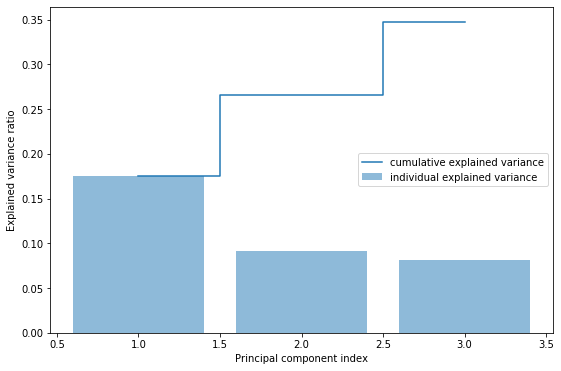

In [29]:
import matplotlib.pyplot as plt

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize = (9, 6))
plt.bar(range(1,4), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,4), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc=7)

In [30]:
X_train_pca.shape

(6854, 3)